In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.arange(start=0,stop=1.1,step=0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
y =[]
h=0.2
for i in range(11):
    m=(x[i]**3)+2
    y.append(m)
y

[2.0, 2.001, 2.008, 2.027, 2.064, 2.125, 2.216, 2.343, 2.512, 2.729, 3.0]

In [5]:
k=6/(h)**2
a=[]
for i in range(4):
    p=2*i
    m=k*(y[p]-2*y[p+2]+y[p+4])
    a.append(m)


In [6]:

A=np.array([[4,1,0,0],[1,4,1,0],[0,1,4,1],[0,0,1,4]])
#used linalg to solve matrix
S=np.linalg.solve(A,a)
M=[]
M.append(0)
for i in range(4):
    M.append(S[i])
M.append(0)
M
    

#the values of M

[0,
 1.1712918660287075,
 2.514832535885174,
 3.1693779904306054,
 6.407655502392353,
 0]

In [7]:
# find polynomial
f=[]
for k in range (5):
    c=0.1+0.1*2*k
    d=x[2*(k+1)]-c
    e=c-x[2*k]
    b=(y[2*(k+1)]/h)*e+(y[2*k]/h)*d+(M[k]/6)*((d**3)/h-h*d)+(M[(k+1)]/6)*((e**3)/h-h*e)
    f.append(b)
print(f)
E=[]
for i in range(5):
    m=f[i]-y[2*i+1]
    E.append(m)
E


[2.0010717703349283, 2.0267846889952157, 2.125789473684211, 2.3400574162679417, 2.7399808612440184]


[7.177033492844487e-05,
 -0.00021531100478444642,
 0.0007894736842111172,
 -0.002942583732058246,
 0.010980861244018314]

In [8]:
z=np.array([0.1,0.3,0.5,0.7,0.9])

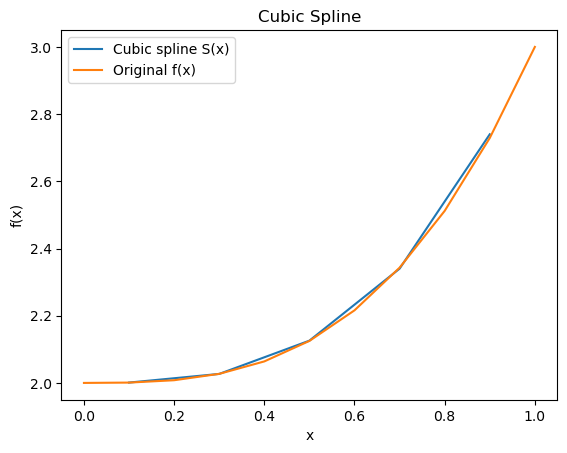

In [9]:
plt.plot(z,f,label="Cubic spline S(x)")
plt.plot(x,y,label ="Original f(x)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cubic Spline')
plt.legend()
plt.show()

### Question:- 2
#### For a natural cubic spline, Polynomial should be defferentiable in domain and second derivative at end points is zero

In [10]:
def diff(n,A): # n is degree of polynomial
    D=[]
    for i in range(n):
        m=(i+1)*A[i+1]
        D.append(m)
    return D
def value(n,A,a):
    m=0
    for i in range(n+1):
        m+=A[i]*(a**i)
    return m
        

In [11]:
# for polynomial such as a*x^2+b*x+c; Array is used to store coffecient like A[0]=c, A[1]=b,A[2]=a
P1=np.array([0,0,0,-3])
P2=[]
for i in range(2):
    n=value(3-i,P1,2)
    if i==0:
        P2.append(n)
    else:
        P2.append(n/i)
    P1=diff(3-i,P1)
n=value(1,P1,2)
n=n/(i+1)
P2.append(n)
m=(n/-3)
P2.append(m)
P2

[-24, -36.0, -18.0, 6.0]